In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
data = pd.read_csv("../../data/iris.csv")
data



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
# VarianceThreshold
# Cela permet de supprimer les caractéristiques dont la variance est inférieure à un certain seuil.
# Pour supprimer les variables faible car elles ne contiennent pas beaucoup d'informations.
selector = VarianceThreshold(threshold=0.2)
data_transformed = selector.fit_transform(data.select_dtypes(include=[np.number]))
pd.DataFrame(data_transformed)

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [15]:
# Afficher la variance de chaque caractéristique
variances = selector.variances_
feature_names = data.select_dtypes(include=[np.number]).columns
variance_df = pd.DataFrame({'Feature': feature_names, 'Variance': variances})
print(variance_df)

        Feature  Variance
0  sepal.length  0.681122
1   sepal.width  0.188713
2  petal.length  3.095503
3   petal.width  0.577133


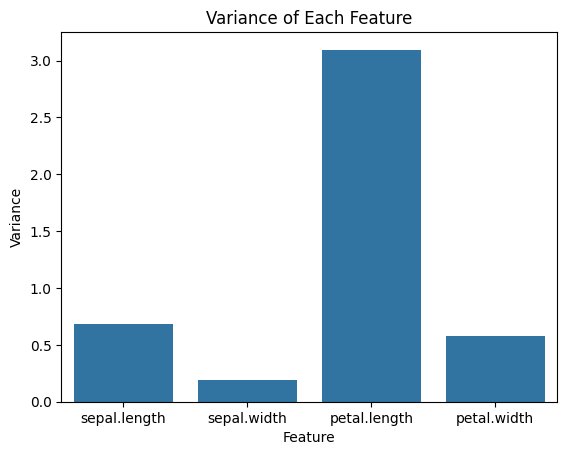

In [16]:
# Create a bar plot to visualize the variance of each feature
sns.barplot(x='Feature', y='Variance', data=variance_df)
plt.title('Variance of Each Feature')
plt.show()